<a href="https://colab.research.google.com/github/FMHanalytics/katacoda-scenarios/blob/main/D209_Task1_KNN_rvsd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D209 Task 1

# Part 1

## A1 Research Question

**Can we predict telecommunications customer churn using k nearest neighbors?**

## A2 Goal of the Data Analysis

**The goal of this data mining project is to create an effective machine learning model using the K Nearnest Neighbors Clssification in Python.**

The goal of this data mining project is to create an effective machine learning model using the K Nearest Neighbors Classification in Python. Using data to predict churn enables the company to make more informed decisions about its operations, pricing, and technical support/customer service strategies. This data-driven approach can lead to more effective and efficient business practices.

## B1 How the KNN Classification Model Analyzes the Churn data set

KNN is
Calculating Distances: KNN calculates the distances between the data point to be classified and all other data points in the training set.
Euclidean distance is a standard metric used for this calculation.
Identifying Nearest Neighbors: The algorithm determines the k nearest neighbors (data points with the shortest distances) to the target data point.
Classification: The target data point is assigned to the class that is most frequent among its k nearest neighbors
(e.g., if most nearest neighbors are churners, the target data point is also classified as a churner).

## B2 One Assumption of KNN

**Distance Metric**: Euclidean distance assumes that all features contribute equally to the similarity between data points.

## B3  Packages Employed

In [1]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

import altair as alt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# set display option
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Part III: Data Preparation

## C1 Data Preprocessing Goal

### The primary data processing goal is to improve the quality of the data in order to obtain the best possible model performance.

**Preleiminary Data Prep-Load, Check for Duplicates, Fix any data errors and missing values**

In [3]:
# load churn dataset
churn_D209=pd.read_csv('/content/churn_clean.csv')

In [4]:
print(churn_D209.head())


   CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  Population      Area             TimeZone  \
0  99927  56.25100 -133.37571          3

In [5]:
print(churn_D209.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

**Check for Missing Data**

In [6]:
# how many nulls in each column?
churn_D209.isnull().sum()

,0
CaseOrder,0
Customer_id,0
Interaction,0
UID,0
City,0
State,0
County,0
Zip,0
Lat,0
Lng,0


**Check for Duplicates**

In [7]:
churn_D209.duplicated()
print(churn_D209.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [8]:
duplicate_rows = churn_D209.loc[churn_D209.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, TimeZone, Job, Children, Age, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []


**Fix missing leading zeros in zip code data to bring them to correct**

In [9]:
def fix_zip(series):
      return series.astype(str).str.extract('(\d+)', expand=False).str.zfill(5)
churn_D209['fixed_zip'] = fix_zip(churn_D209['Zip'])
churn_D209_sorted=churn_D209.sort_values('fixed_zip')
print (churn_D209_sorted['fixed_zip'].to_markdown())

|      |   fixed_zip |
|-----:|------------:|
| 2359 |       00601 |
|  815 |       00610 |
| 3431 |       00647 |
| 3259 |       00652 |
| 2124 |       00662 |
| 3102 |       00667 |
| 4909 |       00674 |
| 3609 |       00674 |
| 5045 |       00683 |
| 6915 |       00692 |
| 5126 |       00692 |
| 8257 |       00694 |
| 3629 |       00698 |
| 1321 |       00703 |
| 1580 |       00720 |
| 3053 |       00725 |
| 7110 |       00728 |
|  513 |       00731 |
| 6903 |       00735 |
| 8940 |       00738 |
| 9802 |       00754 |
| 6805 |       00773 |
| 9426 |       00777 |
| 6007 |       00782 |
|   11 |       00783 |
| 7196 |       00784 |
| 4232 |       00794 |
| 5696 |       00912 |
| 4677 |       00915 |
| 5918 |       00927 |
| 6742 |       00949 |
| 8533 |       00952 |
| 9002 |       00956 |
| 1958 |       00959 |
| 4038 |       00959 |
| 8753 |       00961 |
| 3262 |       00962 |
| 9427 |       00971 |
| 5288 |       00987 |
| 3158 |       00987 |
|  179 |       01005 |
| 9265 |   

In [10]:
unique_zip_count = churn_D209['fixed_zip'].nunique()

print(f"There are {unique_zip_count} unique zip codes in the dataset.")

There are 8583 unique zip codes in the dataset.


**Rename Survey Response Importance Rating Column Names**

In [11]:
churn_D209.rename(columns = {'Item1': 'timely_response', 'Item2': 'timely_fixes' , 'Item3':'timely_replacements',\
                             'Item4': 'reliability' , 'Item5': 'options' , 'Item6': 'respectful_response',\
                             'Item7': 'courteous_exchange' , 'Item8': 'evidence_of_active_listening'}, inplace =True)

In [12]:
churn_D209.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,evidence_of_active_listening,fixed_zip
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,99927
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,48661
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,97148
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,92014
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,77461


In [13]:
# remove unneeded columns

churn_D209=churn_D209.drop(columns=['CaseOrder','Interaction','UID','TimeZone','Zip'])
churn_D209.head()

,Customer_id,City,State,County,Lat,Lng,Population,Area,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,evidence_of_active_listening,fixed_zip
0,K409198,Point Baker,AK,Prince of Wales-Hyder,56.25100,-133.37571,38,Urban,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,99927
1,S120509,West Branch,MI,Ogemaw,44.32893,-84.24080,10446,Urban,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,48661
2,K191035,Yamhill,OR,Yamhill,45.35589,-123.24657,3735,Urban,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,97148
3,D90850,Del Mar,CA,San Diego,32.96687,-117.24798,13863,Suburban,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,92014
4,K662701,Needville,TX,Fort Bend,29.38012,-95.80673,11352,Suburban,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,77461


**Reorder Columns with Fixed Zip replacing original Zip**

In [14]:
new_columns = ['Customer_id', 'City', 'State', 'County',
       'fixed_zip', 'Lat', 'Lng', 'Population', 'Area', 'Job',
       'Children', 'Age', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'timely_response', 'timely_fixes',
       'timely_replacements', 'reliability', 'options', 'respectful_response',
       'courteous_exchange', 'evidence_of_active_listening']
churn_D209=churn_D209.reindex(columns=new_columns)
churn_D209.columns

Index(['Customer_id', 'City', 'State', 'County', 'fixed_zip', 'Lat', 'Lng',
       'Population', 'Area', 'Job', 'Children', 'Age', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'timely_response', 'timely_fixes',
       'timely_replacements', 'reliability', 'options', 'respectful_response',
       'courteous_exchange', 'evidence_of_active_listening'],
      dtype='object')

In [15]:
churn_D209.shape

(10000, 46)

**Replace Missing Values for Internet Service**

In [16]:
churn_D209['InternetService']=churn_D209['InternetService'].fillna('None')
missing_data=churn_D209.isnull().sum()
print(missing_data)

Customer_id                     0
City                            0
State                           0
County                          0
fixed_zip                       0
Lat                             0
Lng                             0
Population                      0
Area                            0
Job                             0
Children                        0
Age                             0
Income                          0
Marital                         0
Gender                          0
Churn                           0
Outage_sec_perweek              0
Email                           0
Contacts                        0
Yearly_equip_failure            0
Techie                          0
Contract                        0
Port_modem                      0
Tablet                          0
InternetService                 0
Phone                           0
Multiple                        0
OnlineSecurity                  0
OnlineBackup                    0
DeviceProtecti

## Export Prepared Data Set

In [17]:
churn_D209.to_csv(r'D:\WGU\D209 Data Mining I\churn_prep_mh.csv')

**Group Geographically**

Grouped the data geographically.  Condided doing geospatial analysis but decided that customers were too spread out to warrant the time that would need to be spent.

In [18]:
churn_D209_locations_sorted=churn_D209.sort_values(['State','City','fixed_zip'], ascending=[True,True,True])
print(churn_D209_locations_sorted.head())

     Customer_id            City State            County fixed_zip       Lat  \
6767     S337666        Akiachak    AK            Bethel     99551  60.90924   
7146      A17652       Allakaket    AK     Yukon-Koyukuk     99720  66.56354   
1696     M520636          Ambler    AK  Northwest Arctic     99786  67.17316   
875      V447329  Anaktuvuk Pass    AK       North Slope     99721  68.15449   
4640     B499886  Anaktuvuk Pass    AK       North Slope     99721  68.15449   

            Lng  Population      Area                             Job  \
6767 -161.42030         567     Rural     Advertising account planner   
7146 -152.77600         174     Urban                   Media planner   
1696 -155.95418         299  Suburban  Furniture conservator/restorer   
875  -151.70963         265  Suburban                    Metallurgist   
4640 -151.70960         265     Rural                    Neurosurgeon   

      Children  Age     Income        Marital  Gender Churn  \
6767         2   

**Visualize Churn Distribution**

In [19]:
# Calculate the count and percentage of each value in the `Churn` column
churn_counts = (churn_D209['Churn'].value_counts().reset_index())
churn_counts.columns = ['Churn', 'Count']
total_count = churn_counts['Count'].sum()
churn_counts['Percentage'] = ((churn_counts['Count'] / total_count) * 100).round(2)
print(churn_counts)

  Churn  Count  Percentage
0    No   7350        73.5
1   Yes   2650        26.5


In [20]:
# Create a bar chart to visualize the distribution of `Churn`
bar_chart = alt.Chart(churn_counts).mark_bar().encode(
    x=alt.X('Churn:N', axis=alt.Axis(title='Churn')),
    y=alt.Y('Count:Q', axis=alt.Axis(title='Count')),
    tooltip=['Churn', 'Count', 'Percentage']
).properties(
    title='Churn Distribution (Bar Chart)'
)
display(bar_chart)

alt.Chart(...)

In [21]:
# Create a pie chart to visualize the distribution of `Churn`
pie_chart = alt.Chart(churn_counts).mark_arc(innerRadius=0, outerRadius=100).encode(
    theta=alt.Theta(field="Count", type="quantitative"),
    color=alt.Color(field="Churn", type="nominal"),
    tooltip=['Churn', 'Count', 'Percentage']
).properties(
    title='Churn Distribution (Pie Chart)'
)
display(pie_chart)

alt.Chart(...)

In [22]:
# Combine the two charts into subplots
fig = alt.hconcat(bar_chart, pie_chart)

# Display the chart
display(fig)

alt.HConcatChart(...)

# C2 Initial Set of Variables

# Feature Selection

**Compare churn rates and frequency of those rate of various categorical variables to identify any significant differences**

In [23]:
# Create a list of categorical columns to compare, excluding `Churn` and the ID columns
categorical_columns = [
    'State', 'Marital', 'Gender','Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'
]


In [24]:
# Initialize an empty DataFrame to store the results
categorical_comparison_df = pd.DataFrame(columns=['Column', 'Category', 'Churn Rate', 'Count'])


In [25]:
# Iterate through each categorical column
for col in categorical_columns:
# Calculate churn rate for each category within the column
    grouped_data = churn_D209.groupby(col)['Churn'].value_counts(normalize=True).unstack(fill_value=0)
    churn_rates = grouped_data['Yes'].reset_index()
    churn_rates.columns = ['Category', 'Churn Rate']
    churn_rates['Column'] = col
    category_counts = churn_D209[col].value_counts().reset_index()
    category_counts.columns = ['Category', 'Count']
   # Merge churn rates with category counts
    churn_rates = churn_rates.merge(category_counts, on='Category')
 # Append the results to the DataFrame
    categorical_comparison_df = pd.concat([categorical_comparison_df, churn_rates], ignore_index=True)


In [26]:
# Display the DataFrame sorted by `Churn Rate` in descending order
print(categorical_comparison_df.sort_values(by='Churn Rate', ascending=False).to_markdown(index=False))

| Column           | Category                 |   Churn Rate |   Count |
|:-----------------|:-------------------------|-------------:|--------:|
| State            | DC                       |     0.5      |      14 |
| StreamingMovies  | Yes                      |     0.395501 |    4890 |
| Contract         | Month-to-month           |     0.372801 |    5456 |
| StreamingTV      | Yes                      |     0.368026 |    4929 |
| State            | CT                       |     0.352113 |      71 |
| State            | WA                       |     0.348571 |     175 |
| Techie           | Yes                      |     0.330554 |    1679 |
| Multiple         | Yes                      |     0.327908 |    4608 |
| InternetService  | DSL                      |     0.321686 |    3463 |
| State            | WV                       |     0.311741 |     247 |
| State            | MD                       |     0.308943 |     123 |
| State            | MT                       |    

**filter out the low-frequency (<100 count) categories and focus on the remaining ones**

In [27]:
# Get the count of occurrences for each category in each categorical column
category_counts = {col: churn_D209[col].value_counts() for col in categorical_columns}

# Filter out categories that occur less than 100 times
filtered_categorical_columns = [
    col for col in categorical_columns if (category_counts[col] >= 100).any()
]

# Initialize an empty DataFrame to store the results
filtered_categorical_analysis_df = pd.DataFrame(
    columns=['Column', 'Category', 'Churn Rate', 'Count']
)

# Iterate through each filtered categorical column
for col in filtered_categorical_columns:
    # Calculate churn rate for each category within the column
    grouped_data = (
        churn_D209.groupby(col)['Churn'].value_counts(normalize=True).unstack(fill_value=0)
    )
    churn_rates = grouped_data['Yes'].reset_index()
    churn_rates.columns = ['Category', 'Churn Rate']
    churn_rates['Column'] = col

    # Get the count of each category
    category_counts_df = category_counts[col].reset_index()
    category_counts_df.columns = ['Category', 'Count']

    # Merge churn rates with category counts
    churn_rates = churn_rates.merge(category_counts_df, on='Category')

    # Filter out categories with count less than 100
    churn_rates = churn_rates[churn_rates['Count'] >= 100]

    # Append the results to the DataFrame
    filtered_categorical_analysis_df = pd.concat(
        [filtered_categorical_analysis_df, churn_rates], ignore_index=True
    )

# Display the DataFrame sorted by `Churn Rate` in descending order
print(
    filtered_categorical_analysis_df.sort_values(
        by='Churn Rate', ascending=False
    ).to_markdown(index=False,numalign="left", stralign="left")
)

| Column           | Category                 | Churn Rate   | Count   |
|:-----------------|:-------------------------|:-------------|:--------|
| StreamingMovies  | Yes                      | 0.395501     | 4890    |
| Contract         | Month-to-month           | 0.372801     | 5456    |
| StreamingTV      | Yes                      | 0.368026     | 4929    |
| State            | WA                       | 0.348571     | 175     |
| Techie           | Yes                      | 0.330554     | 1679    |
| Multiple         | Yes                      | 0.327908     | 4608    |
| InternetService  | DSL                      | 0.321686     | 3463    |
| State            | WV                       | 0.311741     | 247     |
| State            | MD                       | 0.308943     | 123     |
| Phone            | No                       | 0.301179     | 933     |
| State            | WI                       | 0.298246     | 228     |
| DeviceProtection | Yes                      | 0.2

In [28]:
# Filter data for `State` column and create a bar chart
State_chart = alt.Chart(filtered_categorical_analysis_df[filtered_categorical_analysis_df['Column'] == 'State']).mark_bar().encode(
    x=alt.X('Category:N', axis=alt.Axis(title='State', labelAngle=-45)),
    y=alt.Y('Churn Rate:Q', axis=alt.Axis(title='Churn Rate')),
    tooltip=['Category', 'Churn Rate', 'Count']
).properties(
    title='Churn Rate by State'
).interactive()

# Filter data for `StreamingMovies` column and create a bar chart
StreamingMovies_chart = alt.Chart(filtered_categorical_analysis_df[filtered_categorical_analysis_df['Column'] == 'StreamingMovies']).mark_bar().encode(
    x=alt.X('Category:N', axis=alt.Axis(title='StreamingMovies', labelAngle=-45)),
    y=alt.Y('Churn Rate:Q', axis=alt.Axis(title='Churn Rate')),
    tooltip=['Category', 'Churn Rate', 'Count']
).properties(
    title='Churn Rate by StreamingMovies'
).interactive()

# Filter data for `Contract` column and create a bar chart
Contract_chart = alt.Chart(filtered_categorical_analysis_df[filtered_categorical_analysis_df['Column'] == 'Contract']).mark_bar().encode(
    x=alt.X('Category:N', axis=alt.Axis(title='Contract')),
    y=alt.Y('Churn Rate:Q', axis=alt.Axis(title='Churn Rate')),
    tooltip=['Category', 'Churn Rate', 'Count']
).properties(
    title='Churn Rate by Contract'
).interactive()

# Combine the three charts into subplots
charts_subplots = alt.vconcat(State_chart, StreamingMovies_chart, Contract_chart)

# Display the chart
display(charts_subplots)

alt.VConcatChart(...)

In [29]:
# Get the count of occurrences for each category in each categorical column
category_counts = {col: churn_D209[col].value_counts() for col in categorical_columns}

# Filter out categories that occur less than 1000 times
filtered_categorical_columns = [
    col for col in categorical_columns if (category_counts[col] >= 1000).any()
]

# Initialize an empty DataFrame to store the results
filtered_categorical_analysis_df = pd.DataFrame(
    columns=['Column', 'Category', 'Churn Rate', 'Count']
)

# Iterate through each filtered categorical column
for col in filtered_categorical_columns:
    # Calculate churn rate for each category within the column
    grouped_data = (
        churn_D209.groupby(col)['Churn'].value_counts(normalize=True).unstack(fill_value=0)
    )
    churn_rates = grouped_data['Yes'].reset_index()
    churn_rates.columns = ['Category', 'Churn Rate']
    churn_rates['Column'] = col

    # Get the count of each category
    category_counts_df = category_counts[col].reset_index()
    category_counts_df.columns = ['Category', 'Count']

    # Merge churn rates with category counts
    churn_rates = churn_rates.merge(category_counts_df, on='Category')

    # Filter out categories with count less than 1000
    churn_rates = churn_rates[churn_rates['Count'] >= 1000]

    # Append the results to the DataFrame
    filtered_categorical_analysis_df = pd.concat(
        [filtered_categorical_analysis_df, churn_rates], ignore_index=True
    )

# Display the DataFrame sorted by `Churn Rate` in descending order
print(
    filtered_categorical_analysis_df.sort_values(
        by='Churn Rate', ascending=False
    ).to_markdown(index=False,numalign="left", stralign="left")
)

| Column           | Category                 | Churn Rate   | Count   |
|:-----------------|:-------------------------|:-------------|:--------|
| StreamingMovies  | Yes                      | 0.395501     | 4890    |
| Contract         | Month-to-month           | 0.372801     | 5456    |
| StreamingTV      | Yes                      | 0.368026     | 4929    |
| Techie           | Yes                      | 0.330554     | 1679    |
| Multiple         | Yes                      | 0.327908     | 4608    |
| InternetService  | DSL                      | 0.321686     | 3463    |
| DeviceProtection | Yes                      | 0.293206     | 4386    |
| OnlineBackup     | Yes                      | 0.289614     | 4506    |
| PaymentMethod    | Electronic Check         | 0.283402     | 3398    |
| Marital          | Separated                | 0.278054     | 2014    |
| Gender           | Male                     | 0.278035     | 4744    |
| TechSupport      | Yes                      | 0.2

**Visualize the churn rates by StreamingTV, StreamingMovies, Contract, Multiple (lines) and InternetService**

In [30]:
# Filter data for `StreamingTV` column and create a bar chart
StreamingTV_chart = alt.Chart(filtered_categorical_analysis_df[filtered_categorical_analysis_df['Column'] == 'StreamingTV']).mark_bar().encode(
    x=alt.X('Category:N', axis=alt.Axis(title='StreamingTV', labelAngle=-45)),
    y=alt.Y('Churn Rate:Q', axis=alt.Axis(title='Churn Rate')),
    tooltip=['Category', 'Churn Rate', 'Count']
).properties(
    title='Churn Rate by StreamingTV'
).interactive()

# Filter data for `StreamingMovies` column and create a bar chart
StreamingMovies_chart = alt.Chart(filtered_categorical_analysis_df[filtered_categorical_analysis_df['Column'] == 'StreamingMovies']).mark_bar().encode(
    x=alt.X('Category:N', axis=alt.Axis(title='StreamingMovies', labelAngle=-45)),
    y=alt.Y('Churn Rate:Q', axis=alt.Axis(title='Churn Rate')),
    tooltip=['Category', 'Churn Rate', 'Count']
).properties(
    title='Churn Rate by StreamingMovies'
).interactive()

# Filter data for `Contract` column and create a bar chart
Contract_chart = alt.Chart(filtered_categorical_analysis_df[filtered_categorical_analysis_df['Column'] == 'Contract']).mark_bar().encode(
    x=alt.X('Category:N', axis=alt.Axis(title='Contract')),
    y=alt.Y('Churn Rate:Q', axis=alt.Axis(title='Churn Rate')),
    tooltip=['Category', 'Churn Rate', 'Count']
).properties(
    title='Churn Rate by Contract'
).interactive()

# Filter data for `InternetService` column and create a bar chart
internet_svc_chart = alt.Chart(filtered_categorical_analysis_df[filtered_categorical_analysis_df['Column'] == 'InternetService']).mark_bar().encode(
    x=alt.X('Category:N', axis=alt.Axis(title='InternetService')),
    y=alt.Y('Churn Rate:Q', axis=alt.Axis(title='Churn Rate')),
    tooltip=['Category', 'Churn Rate', 'Count']
).properties(
    title='Churn Rate by Internet Service'
).interactive()
# Combine the three charts into subplots
charts_subplots = alt.vconcat(StreamingTV_chart, StreamingMovies_chart, Contract_chart, internet_svc_chart)

# Filter data for `Multiple` column and create a bar chart
multiple_chart = alt.Chart(filtered_categorical_analysis_df[filtered_categorical_analysis_df['Column'] == 'Multiple']).mark_bar().encode(
    x=alt.X('Category:N', axis=alt.Axis(title='Multiple')),
    y=alt.Y('Churn Rate:Q', axis=alt.Axis(title='Churn Rate')),
    tooltip=['Category', 'Churn Rate', 'Count']
).properties(
    title='Churn Rate by Multiple'
).interactive()
# Combine the three charts into subplots
charts_subplots = alt.vconcat(StreamingTV_chart, StreamingMovies_chart, Contract_chart, internet_svc_chart, multiple_chart)


# Display the chart
display(charts_subplots)

alt.VConcatChart(...)

Streaming services and Contract duration appear to have more influence on Churn (> .35) than the type of internet service or number of lines.

 **Compare the churn rates of selected continuous variables: Tenure, MonthlyCharge, Bandwidth_GB_Year, Outage_sec_perweek, Yearly_equip_failure, Email, and Contacts**

In [31]:
# 1. Define a list of numerical columns to analyze
numerical_columns = [
    'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Outage_sec_perweek',
    'Yearly_equip_failure', 'Email', 'Contacts'
]

# 2. Initialize an empty DataFrame to store the results
numerical_analysis_df = pd.DataFrame(columns=['Column', 'Bin', 'Churn Rate', 'Count'])

# 3. Iterate through each numerical column
for col in numerical_columns:
    # 4. Calculate quantiles and drop duplicates
    quantiles = churn_D209[col].quantile(np.linspace(0, 1, 6)).unique()

    # 5. Adjust the number of bins if necessary
    num_bins = min(5, len(quantiles) - 1)  # Ensure at least 2 bins

    # 6. Manually create bins and labels
    bins = [-np.inf] + list(quantiles[1:])  # Include -inf for the first bin
    labels = [f'Bin {i}' for i in range(1, num_bins + 1)]

    # 7. Divide the data into bins
    churn_D209['Bin'] = pd.cut(churn_D209[col], bins=bins, labels=labels, right=False)

    # 8. Calculate churn rate for each bin
    grouped_data = churn_D209.groupby('Bin')['Churn'].value_counts(normalize=True).unstack(fill_value=0)
    churn_rates = grouped_data['Yes'].reset_index()
    churn_rates.columns = ['Bin', 'Churn Rate']
    churn_rates['Column'] = col

    # 9. Get the count of each bin
    bin_counts = churn_D209['Bin'].value_counts().reset_index()
    bin_counts.columns = ['Bin', 'Count']

    # 10. Merge churn rates with bin counts
    churn_rates = churn_rates.merge(bin_counts, on='Bin')

    # 11. Append the results to the DataFrame
    numerical_analysis_df = pd.concat([numerical_analysis_df, churn_rates], ignore_index=True)

    # 12. Drop the temporary 'Bin' column
    churn_D209.drop(columns=['Bin'], inplace=True)

# Display outputs:

# 1. Display the updated `numerical_analysis_df` DataFrame sorted by `Column` and `Bin` in ascending order
print(numerical_analysis_df.sort_values(by=['Column', 'Bin']).to_markdown(index=False,numalign="left", stralign="left"))

# 2. Create line charts to visualize the churn rate by each numerical column.
line_chart = alt.vconcat()
for col in numerical_columns:
    chart = alt.Chart(numerical_analysis_df[numerical_analysis_df['Column'] == col]).mark_line(point=True).encode(
        x='Bin:O',
        y='Churn Rate:Q',
        tooltip=['Bin', 'Churn Rate', 'Count']
    ).properties(
        title=f'Churn Rate by {col}'
    )
    line_chart |= chart

# 4. Combine the charts vertically and display the combined chart
# 3. The charts should display the churn rate on the y-axis and the bins on the x-axis, with tooltips showing the bin, churn rate, and count

display(line_chart)

| Column               | Bin   | Churn Rate   | Count   |
|:---------------------|:------|:-------------|:--------|
| Bandwidth_GB_Year    | Bin 1 | 0.4335       | 2000    |
| Bandwidth_GB_Year    | Bin 2 | 0.503        | 2000    |
| Bandwidth_GB_Year    | Bin 3 | 0.2885       | 2000    |
| Bandwidth_GB_Year    | Bin 4 | 0.049        | 2000    |
| Bandwidth_GB_Year    | Bin 5 | 0.0510255    | 1999    |
| Contacts             | Bin 1 | 0.258696     | 3680    |
| Contacts             | Bin 2 | 0.268571     | 3675    |
| Contacts             | Bin 3 | 0.268357     | 2642    |
| Email                | Bin 1 | 0.254922     | 1981    |
| Email                | Bin 2 | 0.258845     | 1074    |
| Email                | Bin 3 | 0.261053     | 2601    |
| Email                | Bin 4 | 0.27921      | 2328    |
| Email                | Bin 5 | 0.266501     | 2015    |
| MonthlyCharge        | Bin 1 | 0.0797392    | 1994    |
| MonthlyCharge        | Bin 2 | 0.149547     | 1986    |
| MonthlyCharg

alt.HConcatChart(...)

Looking at the visualizations above It appears that Tenure, MonthlyCharge, and Bandwidth_GB_Year provide more variations than the other continuous variables selected.

After performing feature selection will use the categorical variables StreamingMovies, StreamingTV, and Contract and continuos variables Tenure, MonthlyCharge, and Bandwidth_GB_Year to perform the analysis.

# Part IV Analysis

**Predict which customers are likely to churn based on their similarity to other customers in terms of their tenure, monthly charges, bandwidth usage, streaming services and contract duration using KNN and Euclidean distance in Python**

**Use One-hot Encoding to reexpress "Contract" categorical variable with more than two levels**

In [32]:
#Transform the `Contract' column
contract_encoder = OneHotEncoder(sparse_output=False)
contract_encoded = contract_encoder.fit_transform(churn_D209["Contract"].values.reshape(-1, 1))

# Create column names dynamically based on fitted categories
contract_col_names = [f"Contract_{cat}" for cat in contract_encoder.categories_[0]]

# Add encoded columns to DataFrame
churn_D209 = pd.concat([churn_D209, pd.DataFrame(contract_encoded, columns=contract_col_names)], axis=1)


In [33]:
print(churn_D209.columns)

Index(['Customer_id', 'City', 'State', 'County', 'fixed_zip', 'Lat', 'Lng',
       'Population', 'Area', 'Job', 'Children', 'Age', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'timely_response', 'timely_fixes',
       'timely_replacements', 'reliability', 'options', 'respectful_response',
       'courteous_exchange', 'evidence_of_active_listening',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year'],
      dtype='object')


In [34]:
# 1. Filter the data
relevant_columns = ['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'StreamingMovies', 'StreamingTV',\
                    'Contract_Month-to-month','Contract_One year', 'Contract_Two Year', 'Churn']
churn_filtered = churn_D209[relevant_columns]

# 2. Preprocess the data
# 2.1.a. Encode the `Churn` column
le = LabelEncoder()
churn_filtered['Churn'] = le.fit_transform(churn_filtered['Churn'])

# 2.1.b. Encode the `StreamingMovies` column
le = LabelEncoder()
churn_filtered['StreamingMovies'] = le.fit_transform(churn_filtered['StreamingMovies'])

# 2.1.b. Encode the `StreamingTV` column
le = LabelEncoder()
churn_filtered['StreamingTV'] = le.fit_transform(churn_filtered['StreamingTV'])


# Create column names dynamically based on fitted categories
contract_col_names = [f"Contract_{cat}" for cat in contract_encoder.categories_[0]]

# Add encoded columns to DataFrame
churn_D209 = pd.concat([churn_D209, pd.DataFrame(contract_encoded, columns=contract_col_names)], axis=1)

# 2.2. Standardize the numerical features
scaler = StandardScaler()
numerical_features = ['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
churn_filtered[numerical_features] = scaler.fit_transform(churn_filtered[numerical_features])

# 3. Split the data
X = churn_filtered.drop('Churn', axis=1)
y = churn_filtered['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. export the spilt data

X_train.to_csv(r'D:\WGU\D209 Data Mining I\X_train.csv', index=False)
y_train.to_csv(r'D:\WGU\D209 Data Mining I\y_train.csv', index=False)
X_test.to_csv(r'D:\WGU\D209 Data Mining I\X_test.csv', index=False)
y_test.to_csv(r'D:\WGU\D209 Data Mining I\y_test.csv', index=False)

# 5. Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# 6. Train the model
knn.fit(X_train, y_train)

# 7. Make predictions
y_pred = knn.predict(X_test)

# 8. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 9. Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.8785
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      1456
           1       0.78      0.76      0.77       544

    accuracy                           0.88      2000
   macro avg       0.85      0.84      0.85      2000
weighted avg       0.88      0.88      0.88      2000



**Use Hyperparameter Tuning to improve the accuracy of the model we just performed**

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 21)}

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best n_neighbors:", grid_search.best_params_['n_neighbors'])

# Re-train the model with the best parameters
best_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], metric='euclidean')
best_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tuned = best_knn.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned)

# Print the results
print(f"Tuned Accuracy: {accuracy_tuned}")
print("Tuned Classification Report:\n", report_tuned)

Best n_neighbors: 19
Tuned Accuracy: 0.882
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1456
           1       0.79      0.77      0.78       544

    accuracy                           0.88      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.88      0.88      0.88      2000



In [36]:
y_pred =best_knn.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test, y_pred)

print('ROC AUC score:', roc_auc_score)

ROC AUC score: 0.9401412007110537


In [37]:
from sklearn.metrics import roc_curve
y_pred_prob = knn.predict_proba(X_test)[:,1]
FC, TC, thresholds = roc_curve(y_test, y_pred_prob)

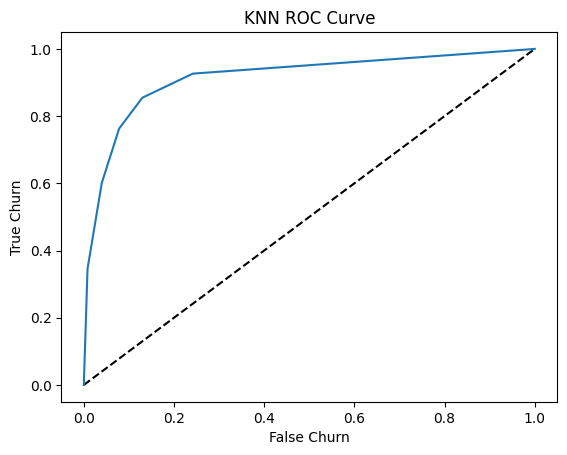

In [38]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(FC, TC, label = 'KNN')
plt.xlabel('False Churn')
plt.ylabel('True Churn')
plt.title('KNN ROC Curve')
plt.show()

# Part V Data Summary and Implications

## E1 Accuracy and AUC

**Accuracy**: The model has an accuracy of **88.2%**, meaning it correctly predicts the class (whether a customer will churn or not) for 88.3% of the customers in the dataset. This was consistent even after hyperparameter tuning.

**AUC (Area Under the Curve)**: The AUC score of **0.9401** indicates that the model has a high ability to distinguish between customers who churn and those who don't. An AUC of 1 represents a perfect model, and an AUC of 0.5 represents a model no better than random chance.


## E2 Results and Implications

**Overall Performance**: The model demonstrates strong predictive performance, with high accuracy and AUC. This suggests it can be a valuable tool for the telecommunications company to identify customers at risk of churning.

**Precision and Recall**: The precision for class 0 (non-churners) is higher than for class 1 (churners). This means the model is more accurate in identifying customers who will stay than those who will leave. The recall for class 0 is also higher, indicating the model is better at correctly identifying all non-churning customers.

**Business Impact**: By accurately identifying potential churners, the company can proactively implement retention strategies, such as targeted promotions or personalized customer service, to reduce churn rates and improve customer satisfaction.


## E3  Limitation

**Hyperparameter Tuning**: Hyperparameter tuning was performed but did not significantly improve accuracy.
This suggests that the initial model parameters were already well-suited for the data or that further exploration of different hyperparameter combinations or alternative modeling techniques might be necessary for better performance.


## E4 Recommendation

Based on the results, the telecommunications company should:

**Deploy the model**: The model's high accuracy and AUC suggest it can effectively identify potential churners.

**Focus on retention**: Develop targeted retention strategies for customers identified as high-risk for churn. This could include personalized offers, loyalty programs, or proactive customer service outreach.

**Further analysis**: Investigate the characteristics of misclassified customers to understand the factors driving churn that the model may not be capturing. This can inform further model refinement or the development of new predictive features.

**Monitor performance**: Continuously monitor the model's performance over time and retrain it periodically with new data to ensure its accuracy remains high as customer behavior evolves.
